In [ ]:
!pip install pillow diffusers torchvision torch accelerate

In [ ]:
from diffusers import DiffusionPipeline
import torch

#safe_tensors for security , only about tensor
pipeline = DiffusionPipeline.from_pretrained("sstablediffusionapi/pony-v6",
  use_safetensors=True, safety_checker=None, requires_safety_checker=False)

device ="cuda" if torch.cuda.is_available() else "cpu"
pipeline.to(device)
print(pipeline)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stablediffusionapi/anything-v5",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



Inside pipeline ,

PNDMScheduler #designed to provide a good balance between speed and quality by using a predictive approach to estimate the noise at each step,


  0%|          | 0/50 [00:00<?, ?it/s]

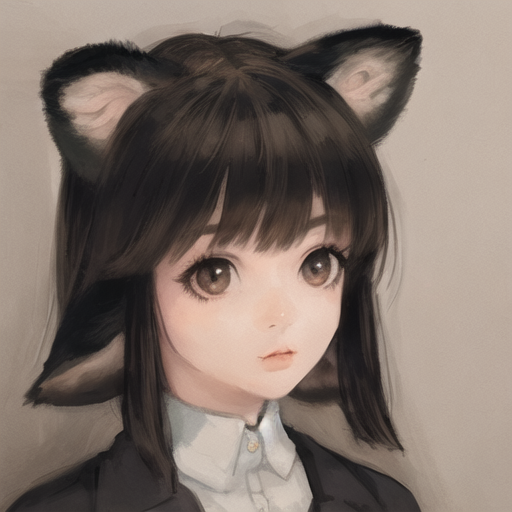

In [ ]:
image = pipeline("girl with puppy ears").images[0]
display(image)

# Lưu ảnh
image.save("puppy_cartoon.png")

In [ ]:
from diffusers import DiffusionPipeline, EulerDiscreteScheduler
import torch

def generate_image(prompt, width, height, steps=30):
    # Load the pipeline
    pipeline = DiffusionPipeline.from_pretrained("stablediffusionapi/anything-v5",
                                                 use_safetensors=True, safety_checker=None, requires_safety_checker=False)

    device = "cuda" if torch.cuda.is_available() else "cpu"
    pipeline.to(device)

    pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

    image = pipeline(prompt, width=width, height=height, num_inference_steps=steps).images[0]

    filename = f"{prompt.replace(' ', '_')}.png"
    image.save(filename)
    print(f"Image saved as {filename}")

if __name__ == "__main__":
    prompt = input("Enter the prompt for the image: ")
    width = int(input("Enter the horizontal size of the image: "))
    height = int(input("Enter the vertical size of the image: "))

    generate_image(prompt, width, height)

Enter the prompt for the image: a knight with third world logo
Enter the horizontal size of the image: 512
Enter the vertical size of the image: 512


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Image saved as a_knight_with_third_world_logo.png


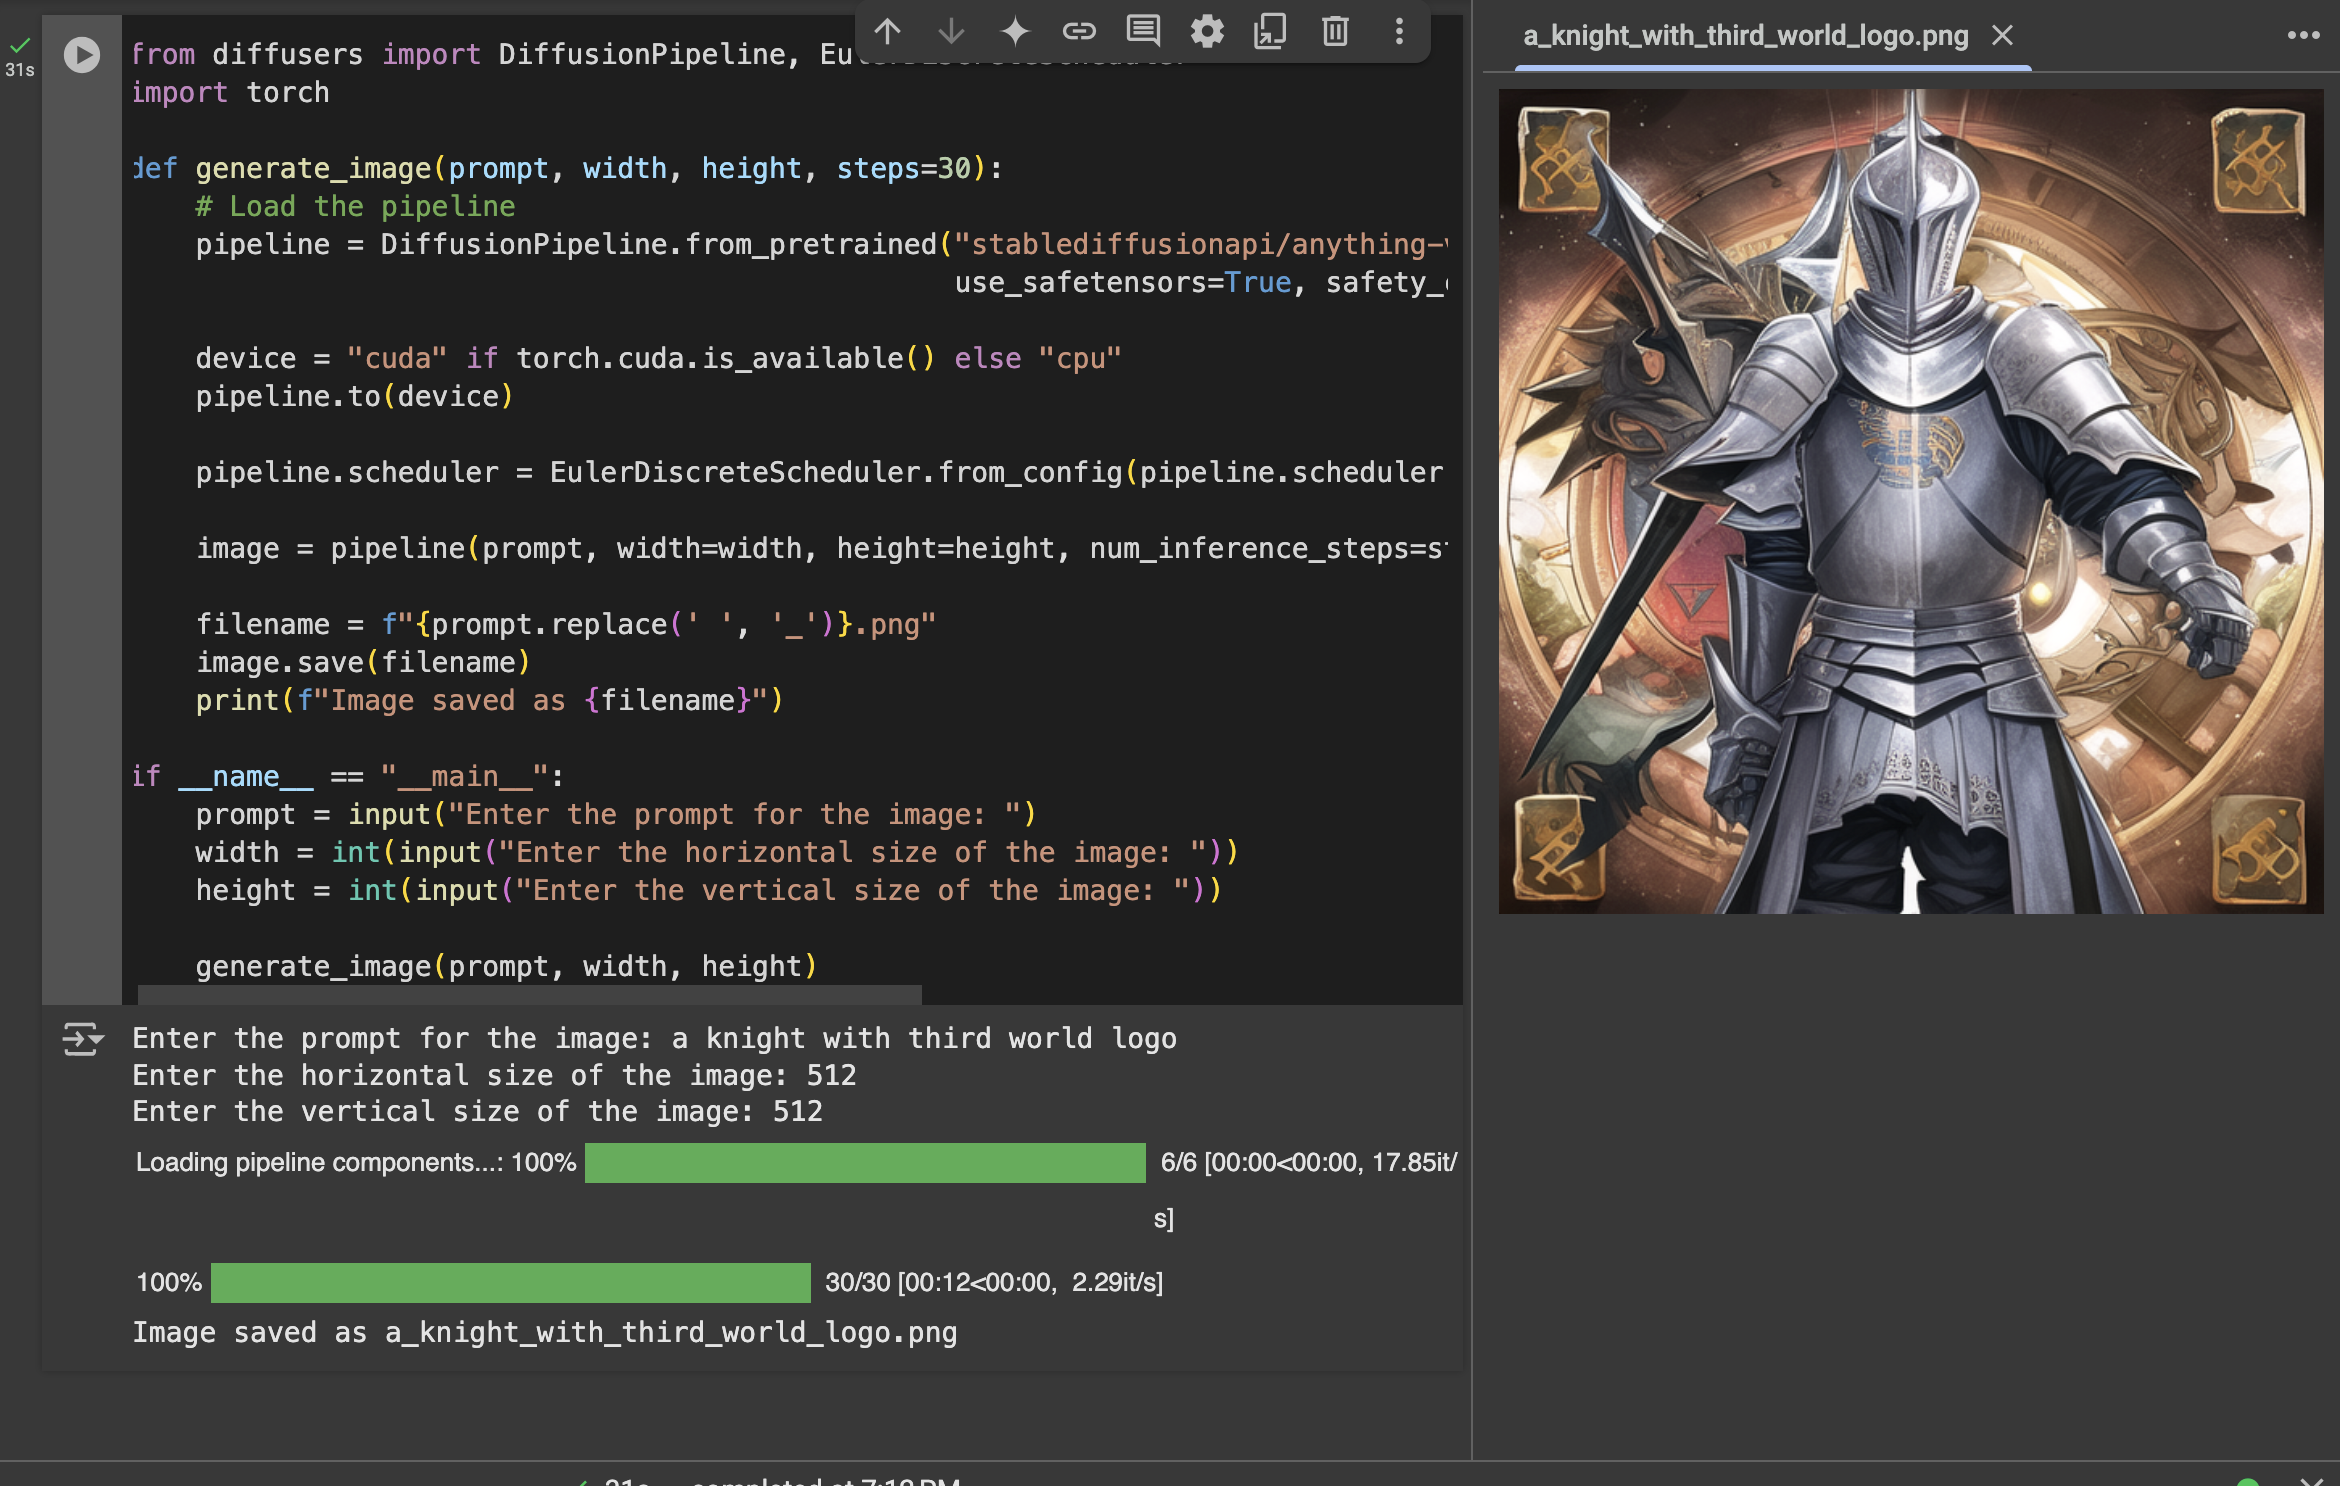